In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

from vega_datasets import data

In [7]:
sf_temps = data.sf_temps()

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [8]:
sf_temps

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [10]:
sf_temps = sf_temps.set_index('date').sort_index()

sf_temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [11]:
sf_temps.resample('D').mean().head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


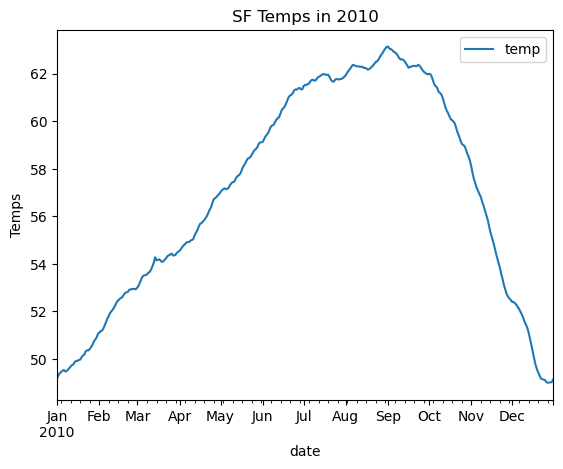

In [13]:
sf_temps.resample('D').mean().plot()
plt.title('SF Temps in 2010')
plt.ylabel('Temps')
plt.show()

Write the code necessary to visualize the minimum temperature over time.


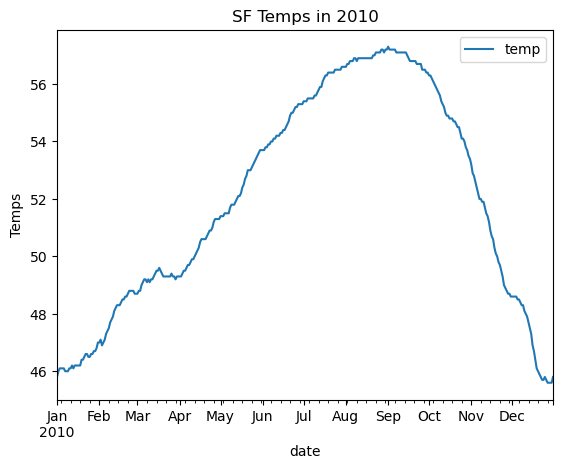

In [14]:
sf_temps.resample('D').min().plot()
plt.title('SF Temps in 2010')
plt.ylabel('Temps')
plt.show()

Write the code necessary to visualize the maximum temperature over time.


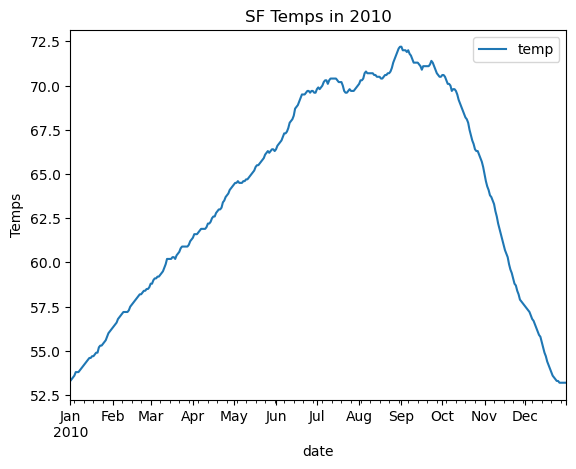

In [15]:
sf_temps.resample('D').max().plot()
plt.title('SF Temps in 2010')
plt.ylabel('Temps')
plt.show()

Which month is the coldest, on average?


In [20]:
sf_temps.temp.resample('M').mean().sort_values().head(1)

date
2010-01-31    49.98414
Name: temp, dtype: float64

Which month has the highest average temperature?


In [21]:
sf_temps.temp.resample('M').mean().sort_values().tail(1)

date
2010-09-30    62.487083
Name: temp, dtype: float64

In [22]:
average_temps = sf_temps.resample('M').mean()

In [23]:
average_temps.describe()

,temp
count,12.000000
mean,56.902309
std,4.610790
min,49.984140
25%,53.528370
50%,56.802012
75%,60.774906
max,62.487083


Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [24]:
daily_temps = sf_temps.temp.resample('D').agg(['min', 'max'])

In [25]:
daily_temps

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [26]:
daily_temps['temp_diff'] = daily_temps['max'] - daily_temps['min']

In [27]:
daily_temps

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [28]:
daily_temps.temp_diff.resample('m').max().sort_values(ascending=False)

date
2010-08-31    15.0
2010-09-30    14.9
2010-06-30    14.8
2010-07-31    14.8
2010-10-31    14.4
2010-05-31    13.1
2010-04-30    13.0
2010-03-31    12.0
2010-11-30    11.8
2010-02-28     9.9
2010-01-31     9.3
2010-12-31     8.9
Name: temp_diff, dtype: float64

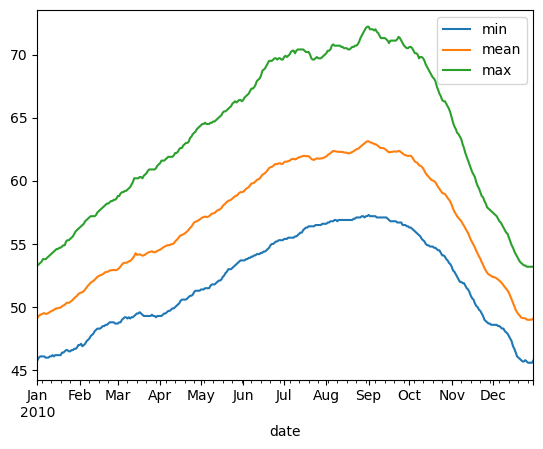

In [30]:
sf_temps.temp.resample('d').agg(['min', 'mean', 'max']).plot()
plt.show()

Use the below dataset for the following exercises:

In [34]:
seattle = data.seattle_weather()

seattle.sample(5)

,date,precipitation,temp_max,temp_min,wind,weather
914,2014-07-03,0.0,21.7,13.9,3.1,sun
355,2012-12-21,1.8,8.3,-1.7,1.7,rain
879,2014-05-29,0.0,18.9,11.1,4.3,sun
751,2014-01-21,0.0,10.0,1.7,1.5,sun
911,2014-06-30,0.0,25.6,12.8,4.4,sun


In [35]:
seattle = seattle.set_index('date').sort_index()

seattle.head()

Which year and month combination has the highest amount of precipitation?

In [41]:
seattle['precipitation'].resample('m').mean().sort_values(ascending=False).head()

date
2015-12-31    9.177419
2014-03-31    7.741935
2015-11-30    7.086667
2012-11-30    7.016667
2012-03-31    5.903226
Name: precipitation, dtype: float64

In [40]:
seattle['precipitation'].resample('m').sum().sort_values(ascending=False).head()

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
2012-11-30    210.5
2012-03-31    183.0
Name: precipitation, dtype: float64

Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

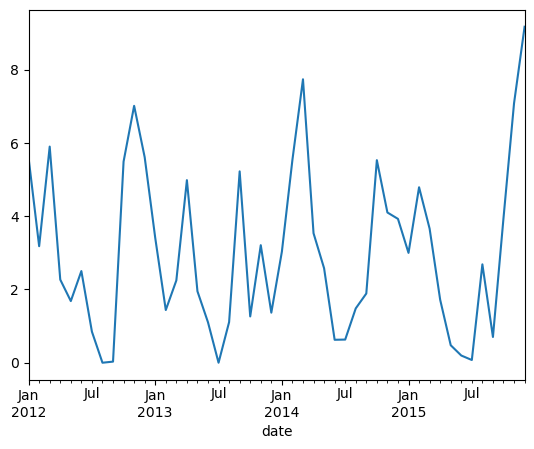

In [44]:
seattle['precipitation'].resample('m').mean().plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

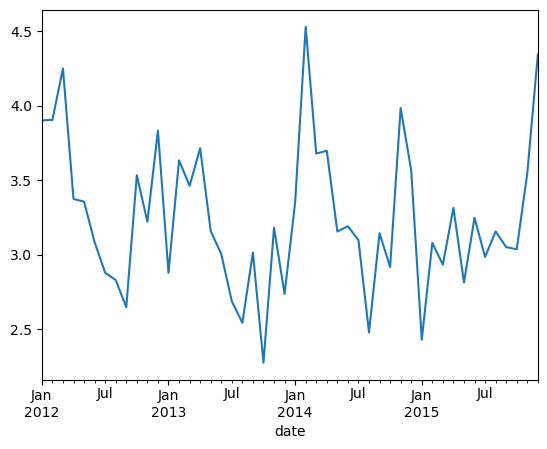

In [46]:
seattle['wind'].resample('m').mean().plot()

Which year-month combination is the windiest?


In [48]:
seattle['wind'].sort_values(ascending=False).head(1)

date
2012-12-17    9.5
Name: wind, dtype: float64

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [50]:
seattle['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [51]:
seattle['weather'].value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [52]:
seattle['sunny_days'] = seattle['weather'] == 'sun'

seattle.head()

In [54]:
seattle['sunny_days'].resample('y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_days, dtype: int64

In which month does it rain the most?


In [55]:
seattle['rainy_days'] = seattle['weather'] == 'rain'

seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_days,rainy_days
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True


In [56]:
seattle['month'] = seattle.index.month

In [57]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_days,rainy_days,month
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,1


In [60]:
seattle['rainy_days'].resample('m').sum().sort_values(ascending=False).head(3)

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
Name: rainy_days, dtype: int64

In [62]:
seattle.groupby('month').rainy_days.sum().sort_values(ascending=False)

month
2     40
3     37
1     35
11    25
12    23
4     20
10    20
6     19
5     16
7     14
8      6
9      4
Name: rainy_days, dtype: int64

Which month has the most number of days with a non-zero amount of precipitation?


In [63]:
seattle['precip_amt'] = seattle['precipitation'] > 0

seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_days,rainy_days,month,precip_amt
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,1,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,1,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,1,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,1,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,1,True


In [65]:
seattle.groupby('month').precip_amt.mean().sort_values(ascending=False).head(3)

month
12    0.653226
2     0.646018
11    0.591667
Name: precip_amt, dtype: float64

Use the below dataset for the following exercises:

In [66]:
flight = data.flights_20k()

Convert any negative delays to 0.

In [69]:
flights = flight.set_index('date').sort_index()

In [70]:
flights['neg_delays'] = flights['delay'] < 0

In [71]:
flights.head()

,delay,distance,origin,destination,neg_delays
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False
2001-01-01 06:20:00,0,491,BNA,MCI,False
2001-01-01 06:30:00,-8,251,MDW,STL,True
2001-01-01 07:00:00,-10,361,OAK,ONT,True
2001-01-01 07:00:00,0,303,MSY,HOU,False


In [72]:
flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])

In [73]:
flights.head()

,delay,distance,origin,destination,neg_delays
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False
2001-01-01 06:20:00,0,491,BNA,MCI,False
2001-01-01 06:30:00,0,251,MDW,STL,True
2001-01-01 07:00:00,0,361,OAK,ONT,True
2001-01-01 07:00:00,0,303,MSY,HOU,False


Which hour of the day has the highest average delay?


In [74]:
flights['hour'] = flights.index.strftime('%H')

flights.head()

,delay,distance,origin,destination,neg_delays,hour
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False,00
2001-01-01 06:20:00,0,491,BNA,MCI,False,06
2001-01-01 06:30:00,0,251,MDW,STL,True,06
2001-01-01 07:00:00,0,361,OAK,ONT,True,07
2001-01-01 07:00:00,0,303,MSY,HOU,False,07


In [76]:
flights.groupby('hour').delay.mean().sort_values(ascending=False).head(1)

hour
03    302.5
Name: delay, dtype: float64

Does the day of the week make a difference in the delay amount?


In [78]:
flights.resample('d').delay.mean()

date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [79]:
flights['day'] = flights.index.day_name()

flights.head()

,delay,distance,origin,destination,neg_delays,hour,day
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False,00,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,False,06,Monday
2001-01-01 06:30:00,0,251,MDW,STL,True,06,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,True,07,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,False,07,Monday


In [81]:
flights.groupby('day').delay.mean().sort_values(ascending=False).head(1)

day
Friday    17.757596
Name: delay, dtype: float64

Does the month make a difference in the delay amount?


In [82]:
flights['month'] = flights.index.month_name()

flights.head()

,delay,distance,origin,destination,neg_delays,hour,day,month
date,,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,False,00,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,False,06,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,True,06,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,True,07,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,False,07,Monday,January


In [86]:
flights.groupby('month').delay.mean().sort_values(ascending=False).head()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

In [87]:
monthly_delay = flights.groupby('month').delay.mean()

monthly_delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

<AxesSubplot:xlabel='month'>

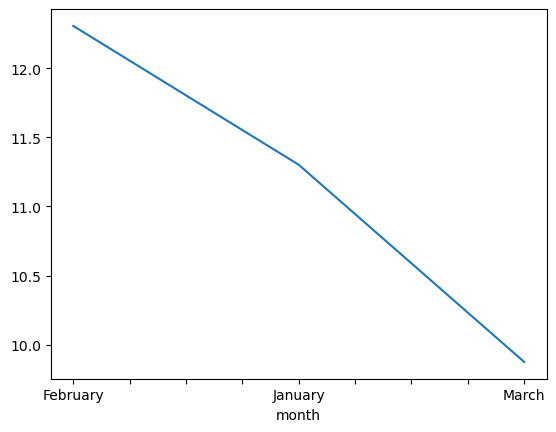

In [88]:
monthly_delay.plot()

## functions made